In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm




In [12]:
def k_means(X, n_clusters, max_iters=100):
    np.random.seed(42) # For reproducibility
    initial_centroids_index = np.random.choice(X.shape[0], n_clusters, replace=False)
    centroids = X[initial_centroids_index]
    for i in tqdm(range(max_iters)):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)
        new_centroids = np.array([X[closest_cluster==k].mean(axis=0) for k in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, closest_cluster

100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


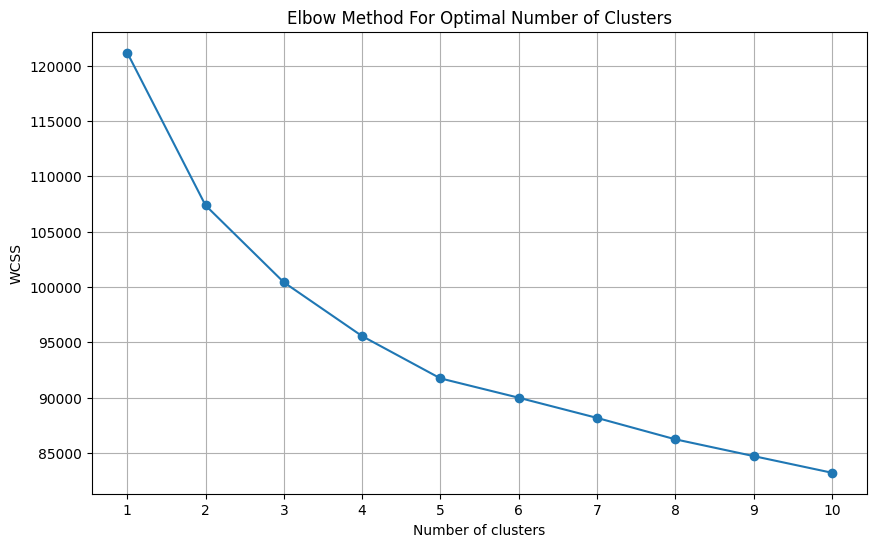

In [13]:
def compute_wcss(X, max_clusters=10):
    wcss = []
    for n_clusters in tqdm(range(1, max_clusters + 1)):
        centroids, assignments = k_means(X, n_clusters)
        distances = np.sqrt(((X - centroids[assignments, :])**2).sum(axis=1))
        wcss.append(distances.sum())
    return wcss

# Compute WCSS for different numbers of clusters
wcss = compute_wcss(df_scaled.values, max_clusters=10)

# Plotting the Elbow Method graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [15]:
# Running K-means with 4 clusters
centroids, assignments = k_means(df_scaled.values, 4)

# Adding the cluster assignments to the original dataframe for analysis
df_clustered = df_numeric.copy()
df_clustered['Cluster'] = assignments

# Display the first few rows of the dataframe with cluster assignments
df_clustered.head()

 49%|████▉     | 49/100 [00:00<00:00, 100.93it/s]


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Cluster
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,1
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,1
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,1
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,1
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,1


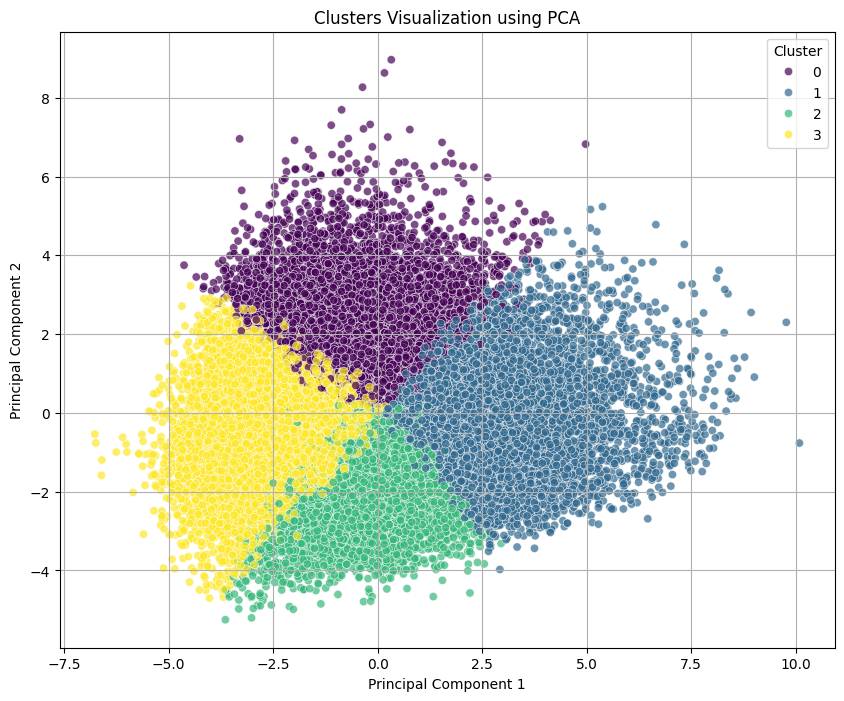

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

df = pd.read_csv('weatherAUS.csv').dropna()
df_numeric = df.select_dtypes(include=[np.number])
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca_clustered = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_clustered['Cluster'] = assignments # Assuming 'assignments' comes from the clustering code
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca_clustered, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()